In this simulation we are calculating TTT and CCT diagrams for following the cooling behaviour of the PM Steels.
The current notebook follows presentation given by A.Malakizadi:

Diploma work No. 42/2010
at Department of Materials and Manufacturing Technology
CHALMERS UNIVERSITY OF TECHNOLOGY
Gotheburg Sweden


# Constitutive equation and finite element formulation

Heat equation is given here in the general form to model also the phase transformations during the phase transformations of the alloy:

Conservation of the energy is given by the equation:
$$
\rho \frac{\partial E}{\partial t} - \nabla(k\nabla T)= 0
$$
where the E is specific internal energy. $ \rho, k$ and $T,t$ are density, thermal conductivity, temperature and time.
Specific internal energy can also be represented using:
$$
E(t,x)= e(T,X_i)
$$
where $ X_i $ for $i={1,2,3,4}$ are volume fraction for example of the perlite, bainite, ferrite and martensite phase.
Differenting the $e(T,X_i)$ with the respect to internal variables:
$$
\frac{\partial e}{\partial T} = c_p \\
\frac{\partial e}{\partial X_i}=-q_i
$$
Thus the general equation is given by:

$$
\rho(T)c_p(T)\frac{\partial T}{\partial t}=\frac{\partial }{\partial x}(k(T)\frac{\partial T}{\partial x}) +
\frac{\partial }{\partial y}(k(T)\frac{\partial T}{\partial y})+\frac{\partial }{\partial z}(k(T)\frac{\partial T}{\partial z})
+\sum{\rho_i(T)q_i(T) \frac{\partial X_i}{\partial t}}
$$

It is important to set also the correct boundary conditions and initial boundary conditions  for the cooling:

Cooling condition for radiation and air convection:
$$
-k\frac{\partial T}{\partial n} = h_c(T) (T-T_{\infty})+\sigma\epsilon(T)(T^{4}-T^{4}_\infty)
$$
If we are cooling by water or quenching:
$$
-k\frac{\partial T}{\partial n} = h_q(T) (T-T_{\infty})
$$
And the start temperature of the sample is given:
$$
T_0 = T(x,y,0)
$$
here the $h_c(T)$ is the convective heat transfer coefficient, $\sigma$ is the Stefan-Boltzmann constant, and $\epsilon $ is radiation emissivity of the surface and $T_\infty$ is the sorounding temperature.
It is possible to reduce the surface radiation to:
$$
\sigma \epsilon(T) (T^4-T^4_\infty)= \sigma \epsilon(T)(T^2+T^2_\infty)(T+T_\infty)(T-T_\infty)=h_r(T)(T-T_\infty)
$$
So combined radiation and convection boundary condition can be expressed by:
$$
-k\frac{\partial T}{\partial n}=h_r(T)(T-T_\infty)+h_c(T) (T-T_{\infty})=h_{rc}(T)(T-T_{\infty})
$$
where $h_{rc}$ is combined heat transfer.  

$$
\rho(T)c_p(T) \frac{\partial T}{\partial t} =k(T)\left( \frac{1}{r}  \frac{\partial }{\partial r}(r\frac{\partial T}{\partial r})+ \frac{\partial^2 T}{\partial z^2}\right)+\sum{\rho_i(T)q_i(T)\frac{\partial X_i}{\partial t}}
$$

## Incoperation of the phase transformation terms

Phase transformation in weak formulation for the phase transformation.
$$
R = \int_{\Gamma}{w rh_{rc} T_\infty}+\int_{\omega} w\sum{\rho_i q_i \frac{\partial X_i}{\partial t} rdrdz}
$$
At constant pressure is the latent heat of transformations are equal to entalphy changes $\rho q_i = \Delta H_i$

$$
R=\int_{\Gamma}{w rh_{rc} T_\infty}+\int_{\omega} w\sum{\Delta H_i \frac{\partial X_i}{\partial t} rdrdz}
$$
Time derivative can be approximated:
$$
\frac{\partial X_i}{\partial t} = \frac{\Delta X_i}{\Delta t}=\frac{X_i^{j+1}-X_i^{j}}{\Delta t}
$$
where $X^{j+1}_i$ is the volume fraction of the phase $i$ at time $j+1$. The thermal properties of the mixture are calculated
using the mixture rule:
$$
\rho c_p = \sum{X_i\rho_i c_{p_i}} \\
k = \sum{X_i k_i}
$$
Both models JMAK and AR model can be used to calculate the amount of the diffusive transformation. We focus now on the JMAK model.


# Scheil principle


The kinetics of the transformation during cooling (anisothermal condition) according to Scheil principle can the approximated by means of infinitesimal time increments $\Delta t$ and ficitious time $t^{*}$ need to gain same fraction of phase $i$ at the current temperature $T_j$

$$
t_j = \Delta t + t_j^{*}
$$
where we can calculate $t^{*}$ from JMAK model as:
$$
t_j^{*} = \left [ \frac{ln(\frac{1}{1-X_{i,j-1}})}{k(T_j)}\right]^{1/n(T_j)}
$$
In the case of the remaining austenite phase we should correct $X_{i,j-1}$ with:
$$
F_{i,j-1}=\frac{X_{i,j-1}}{X_{i,j-1}+X_{\gamma,j-1}}
$$
then previous equation is written as:
$$
t_j^{*} = \left [ \frac{ln(\frac{1}{1-F_{i,j-1}})}{k(T_j)}\right]^{1/n(T_j)}
$$
So we can calculate then the fictious volume fraction of phase $i$ at time $j$:
$$
F_{i,j}^{*}=1-exp\left(-k(T_j)t_j^{n(T_j)} \right)
$$
The incubation time of the diffusive transformation are calculated using equation:
$$
Q = \int_{0}^{t} \frac{d\epsilon}{\tau_s(T(\epsilon))}= \sum\frac{\Delta t}{\tau_s(T_j)}
$$


## Test case

In [1]:
rho=7800; Cp=600.0; k=37.0; alpha=k/(Cp*rho)
def h(T):
    if (T < (225+273)):
        return 20.0
    elif ( (225+273) < T < (800+273) ):
        return -2.11e-9 * T**4 + 3.78e-6 * T**3 -0.00217*T**2 + 0.555*T-32.47
    else:
        return 92.5
    
    

Assuming that the Jominy test can be treated as the semi-infinite plate. The surface exposed to convective boundary condition exposed on one side, the analytical solution is given as:
$$
\frac{T(x,t)-T_i}{T_{\infty}-T_i}=erfc \left(\frac{x}{2\sqrt{\alpha t}}\right) - exp\left(\frac{h x }{k}+\frac{h^2 \alpha t }{k^2}\right)
erfc\left(\frac{x}{2\sqrt{\alpha t}} + \frac{h\sqrt{\alpha t} }{k}\right)
$$
The temperature distribution of the bar at different position $x$ and time $t$ can be obtained if we know distribution of temperature $T$ at previous time step $t_{i-1}$.

In [2]:
import math
def T(x,t,T):
    return math.erfc(x/(2*math.sqrt(alpha*t)))-math.exp(h(T)*x/k + (h(T)**2 * alpha * t/(k**2))) * math.erfc(x/(2*math.sqrt(alpha*t))+h(T)*math.sqrt(alpha*t)/k)

Here we calculate the temperature drop from the one dimensional solution described in previous cell, we set initial temperature of the bar to $T=1173$ K:

In [3]:
t_initial=900.0+273; t_inf=23.0+273
tr=t_initial
temp=[]
for step in range(1,200):
    a=T(0.0,step,tr)
    tr = a*(t_inf-t_initial)+t_initial
    temp.append(tr)

Plot the given temperature for position $x=0$

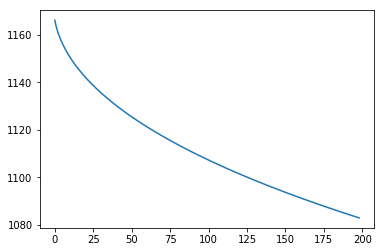

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(temp)
plt.show()


# Calculation of heat transfer

In this section we solve general 2d heat equation using fipy library.

In [5]:
from fipy import *
import numpy as np

## Material properties

Here we define the material properties for the 1080 low carbon stainless steel. The data are taken from the paper "Analysis of temperature and microstructure in Quenching of steel cylinders" by P.R. Woodward, S.R.Chandaseker and H.T.Y. Yang.
Data are saved in the text file for reading.

In [6]:
def read_properties():
    # read the text file for different properties
    densityP = np.loadtxt(fname='./density1080Pearlite.txt', comments='#', delimiter=',', dtype='double')
    densityMA = np.loadtxt(fname='./density1080MartensiteAustenite.txt', comments='#', delimiter=',', dtype='double')
    
    conductivityP = np.loadtxt(fname='./conductivity1080Pearlite.txt', comments='#', delimiter=',', dtype='double')
    conductivityM = np.loadtxt(fname='./conductivity1080Martensite.txt', comments='#', delimiter=',', dtype='double')
    conductivityA = np.loadtxt(fname='./conductivity1080Austenite.txt', comments='#', delimiter=',', dtype='double')
    
    specificP = np.loadtxt(fname='./specificheat1080Pearlite.txt', comments='#', delimiter=',', dtype='double')
    specificMA = np.loadtxt(fname='./specificheat1080MartensiteAustenite.txt', comments='#', delimiter=',', dtype='double')
    
    return (densityP,densityMA,conductivityP,conductivityM, conductivityA,specificP,specificMA)

Interpolate the experimental data to get interpolating function:

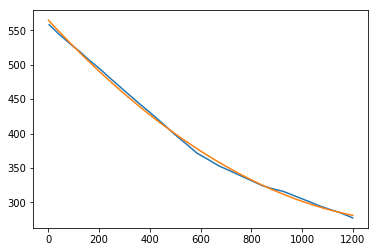

In [7]:
# curve fitting
from scipy.optimize import curve_fit, fsolve, newton
from scipy.interpolate import RectBivariateSpline, CubicSpline
# fit the density function to second order polynomial
def density(x,a,b,c):
     return a*x**2 + b*x + c
def conductivity(x,a,b,c):
    return a*x**2 + b*x + c
def specific_heat(x,a,b,c):
    return a*x**2 + b*x + c
    
#density polynomial
densP = [0.]
condM = [0.]
specificM = [0.]

densityP=read_properties()[0]
densP,pcov = curve_fit(density,densityP[:,0],densityP[:,1])
conductivityM = read_properties()[3]
condM,pcov = curve_fit(conductivity,conductivityM[:,0],conductivityM[:,1])
specificMA = read_properties()[6]
specificM,pcov = curve_fit(specific_heat,specificMA[:,0],specificMA[:,1])
def fP(t_):
    return densP[0]*t_**2+ densP[1]*t_ + densP[2]
def cM(t_):
    return condM[0]*t_**2+ condM[1]*t_ + condM[2]
def sM(t_):
    return specificM[0]*t_**2+ specificM[1]*t_ + specificM[2]

plt.plot(specificMA[:,0],specificMA[:,1])
w = np.linspace(0,1200,100)
plt.plot(w,sM(w))

We now reading the data for cooling coeficient $h_{rc}$. This coefficient contains both contributions from the radiation and convection heat transfer. The data are taken from "Analysis of temperature and microstructure in Quenching of steel cylinders" by P.R. Woodward, S.R.Chandaseker and H.T.Y. Yang

/Users/toniivas/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


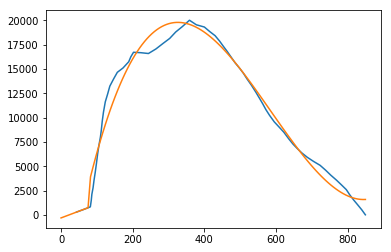

In [8]:
def read_cooling_transfer():
     return np.loadtxt(fname='./cooling1080steel.txt', comments='#', delimiter=',', dtype='double')
def cooling(x,  x0, a,b,c,d,e,f):
    return np.piecewise(x, [x < 82, x >= 82],
                        [lambda x: a*x +b, lambda x: c*x**3+d*x**2+e*x + f])
    
hrcP=[0.]
hrc = read_cooling_transfer()
hrcP,pconv = curve_fit(cooling,hrc[:,0],hrc[:,1])
def hrcf(t_):
      return np.piecewise(t_, [t_ < 82, t_ >= 82],
                        [lambda t_: hrcP[1]*t_ +hrcP[2], lambda t_: hrcP[3]*t_**3+hrcP[4]*t_**2+hrcP[5]*t_ + hrcP[6] ])
        
plt.plot(hrc[:,0],hrc[:,1])
tw = np.linspace(0,850,125)
plt.plot(tw,cooling(tw, *hrcP))

In this section we are reading the data from experimental TTT diagram to evaluate the values of the material parameters $k(T_j)$ and $n(T_j)$. Using the previous equations we can calculate the value of $k(T_j)$:
$$
k(T_j)=-ln(1-F_s)/\theta_j^{n(T_j)}
$$
and
$$
n(T_j)=\frac{ln(\frac{ln(1-F_s)}{ln(1-F_e)})}{ln(\frac{\theta_s}{\theta_e})}
$$
where $\theta$ repesents the equivalent transformation time. $F_s$ and $F_e$ are start fraction of the phase and end fraction of the phase, repectively (usually defined $F_s=0.005$ and $F_e=0.995$).

In this code we first read the experimental data to arrays and then fit x and y data with cubic spline. This gives us information for complete temperature range. The values of $k(T_j)$ and $n(T_j)$ are then calculate using the previous equations.

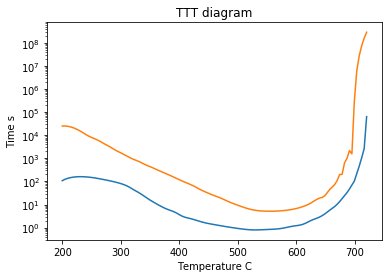

In [9]:
def read_ttt():
    austenite= np.loadtxt(fname='./TTT-diagram1080Austenite.txt', comments='#', delimiter=',', dtype='double')
    pearlite = np.loadtxt(fname='./TTT-diagram1080Pearlite.txt', comments='#', delimiter=',', dtype='double')
    return (austenite, pearlite)


(austenite_line, pearlite_line) = read_ttt()

# interpolate using the cubic spline
pearlitespl=CubicSpline(np.flipud(pearlite_line[:,1]),np.flipud(pearlite_line[:,0]))
austenitespl=CubicSpline(np.flipud(austenite_line[:,1]),np.flipud(austenite_line[:,0]))
#plt.semilogy(pearlite_line[:,1], pearlite_line[:,0])
wt = np.linspace(200,720,125)
figp, axp = plt.subplots()
axp.semilogy(wt, austenitespl(wt))
axp.semilogy(wt, pearlitespl(wt))
axp.set_title('TTT diagram')
axp.set_xlabel('Temperature C')
axp.set_ylabel('Time s')
def calcn(Fs, Fe, startspl,endspl, temperature):
    #determine theta for different temperature
    thetas = startspl(temperature)
    thetae = endspl(temperature)
    return np.log(np.log(1-Fs)/np.log(1-Fe))/np.log(thetas/thetae)

n=calcn(0.005,0.995,austenitespl, pearlitespl, wt) #test calculations
def calck(Fs,n,startspl, temperature):
    #determine k
    thetas = startspl(temperature)
    return -np.log(1-Fs)/(thetas**n)
    
k=calck(0.005,n,austenitespl,wt) #test calculations

Define some common mesh values for 2D heat flow. We create uniform cylinder mesh on which we solve axisymmetric case.

In [10]:
steps = 100
N = 40
L = 2.5*N/4000
dL = L / N
dt = 0.1
mesh = CylindricalGrid2D(dx = dL, dy = dL, nx = N, ny = N)

Also adds the fraction of different phases as cell variable, so we can calculate the contributions from different phases to heat equation.

In [11]:
fi = CellVariable(mesh=mesh, name='fractions', hasOld=True, value=0.0)
fp = CellVariable(mesh=mesh, name='frac. pearlite', hasOld=True, value=0.0)
xi = CellVariable(mesh=mesh, name='volume fract.',hasOld=True, value=0.)
temperature = CellVariable(mesh = mesh, name='temperature',value=1173., hasOld=True)
tincubation = CellVariable(mesh = mesh, name='incubation', value=0., hasOld=True)
n = CellVariable(mesh = mesh, name='jmak exponent', value=0.)
k = CellVariable(mesh = mesh, name='jmak coeff', value=0.)
(r,z) = mesh.cellCenters()

Initial temperature of the cylinder and surface is set to:
$T_o= 1173K$.
Boundary condition at $y=0$ is given by convection cooling condition:
$$
-k \frac{\partial T}{\partial n} = h_{rc}(T) (T-T_{\infty})
$$

The boundary condition on the $x=0$ left side of the domain is isolated:
$$
-k \frac{\partial T}{\partial n} = 0
$$
The temperature on the top and right side of cylinder are set to surounding temperature:
$T_0 = T_{\infty}$

In [12]:
vh = np.vectorize(h)
#temperature.faceGrad.dot([0,1]).constrain(-vh(temperature.faceValue)*1/k*(temperature.faceValue-t_inf),mesh.facesBottom)
temperature.faceGrad.dot([0,1]).constrain(0,mesh.facesBottom)
temperature.faceGrad.dot([1,0]).constrain(0,mesh.facesLeft)
temperature.constrain(t_inf, mesh.facesRight)
#temperature.constrain(1173., mesh.facesTop)
fluxBottom = hrcf(temperature.faceValue.value)*(temperature.faceValue-t_inf) #changed the default value to exp. measured

Calculation of the transformation time (incubation time) before start of diffusive reaction:

In [13]:
def transformation_time(fp,k,n):
    return (np.log(1./(1.-fp)) / k)**(1./n)
def volume_fraction(time,k,n):
    fp.setValue(1-np.exp(-k*time**n), where= tincubation > 1.)

For now we are assuming that complete austinite is transforming directly in martensite phase. We are using here Koistinen-Marburger law:
$$
F_m = (1-exp(-\alpha(T_{ms}-T))(1-\sum_{i=1}F_i)
$$
where $F_i$ represent the fraction of the different fractions of the perlite, banite and austinite phase. The sumation is not done for martensite phase. 
Alpha is constant taken from the paper 

In [14]:
alpha = 1.10E-2; 
Tm= 230+273;    # martensitic start temperature for 1080 steel
def koistinen_marburger(temperature):
    #fi.setValue(1.0-np.exp(-alpha*(Tm-temperature)), where=Tm-temperature > 0)
    fi.setValue( (1.0-(np.exp(-alpha*Tm)*(1+alpha*temperature+0.5*(alpha*temperature)**2+1./6*(alpha*temperature)**3)))*(1.0-fp), where=Tm-temperature > 0)

Define the source term for the phase transformation effects. The phase transformation source contains the fraction of the austinite phase transformed in martensite and enthalpy of the formation.

In [15]:
deltaHm = 640e+6  # martensite enthalpy
deltaHp = 1.56e+9 + 1.5e+6*temperature # pearlite enthalpy
#deltaHm=0.
#def phaseSourceT():
#    return deltaHm*(fi-fi.old)/dt
def phaseSourceT():
    return TransientTerm(var=fi,coeff=deltaHm)+TransientTerm(var=fp,coeff=deltaHp)

Now setup the temperature equation for source term comming from the phase transformations defined the flag phaseTrans.
Here we added also same flux from the right side of the cylinder, assuming that the cooling liquid is also hitting the right side of cylinder.

In [16]:
temperatureEq = TransientTerm(coeff=rho*Cp,var=temperature)== DiffusionTerm(coeff=cM(temperature),var=temperature)+ \
(mesh.facesBottom*fluxBottom).divergence+phaseSourceT()

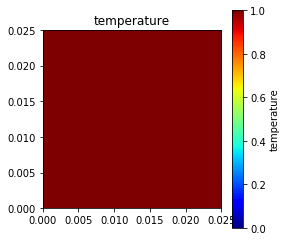

In [17]:
if __name__ == '__main__':
    temperatureViewer = Viewer(vars=temperature,figaspect=1,datamin=0,datamax=1200)

We step the solution in time, plotting as we go interactively

In [ ]:
#import fipy.solvers.pyAMG as solvers
import fipy.solvers.pysparse as solvers
import numpy as np
solver = solvers.linearGMRESSolver.LinearGMRESSolver(precon=None, iterations=1500, tolerance=1e-15) 
poisson= solvers.linearLUSolver.LinearLUSolver()

steps = 3000 # number of steps to calculate
eps =1e-5
Tvstime = [] # temperature values during cooling

for i in range(steps):
    terr=10e+10
    temperature.updateOld()
    fi.updateOld()
    fp.updateOld()
    
    # calculate incubation time
    n = calcn(0.005,0.995,austenitespl, pearlitespl, temperature)
    k = calck(0.005,n,austenitespl,temperature)
    tt = transformation_time(fp,k,n)
    tincubation.setValue(tincubation.value + dt/austenitespl(temperature))
    print tincubation
    # calculate volume fraction of the pearlite phase
    # the reaction start when incubation time reaches 1.0
    volume_fraction(tt+dt,k,n) 
        
    # update martensite fraction using koistinen-marburger eq.
    koistinen_marburger(temperature) 
    # update complete volume fraction
    xi = fp + fi
    print max(xi)
    while(terr > eps):
        print "Residual %f" % terr
        terr = temperatureEq.sweep(temperature, dt=dt,solver=poisson)
    
    #print min(phaseSourceT())
    if __name__ == '__main__':
        path = "../../TEST/temperature/"
        temperatureViewer.plot(path+"temperatureOH"+str(i)+".eps")  
        np.savetxt(path+"temperatureOH"+str(i),temperature)
        np.savetxt(path+"martensiteOH"+str(i),fi)
        np.savetxt(path+"pearliteOH"+str(i),fp)
        Tvstime.append(temperature.value[0])
        print "step: ", i, "Min. temperature",min(temperature), "Max. temperature", max(temperature)
        

/Users/toniivas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


[-2.00177358e-14 -2.00177358e-14 -2.00177358e-14 ... -2.00177358e-14
 -2.00177358e-14 -2.00177358e-14]
0.0
Residual 100000000000.000000
Residual 7927.336533
Residual 1476.520109
Residual 634.942112
Residual 402.450540
Residual 232.335170
Residual 143.957926
Residual 85.974321
Residual 52.744506
Residual 31.921570
Residual 19.524761
Residual 11.885322
Residual 7.266457
Residual 4.435851
Residual 2.713079
Residual 1.658832
Residual 1.015199
Residual 0.621340
Residual 0.380487
Residual 0.233040
Residual 0.142782
Residual 0.087500
Residual 0.053636
Residual 0.032884
Residual 0.020165
Residual 0.012368
Residual 0.007587
Residual 0.004655
Residual 0.002856
Residual 0.001753
Residual 0.001076
Residual 0.000661
Residual 0.000406
Residual 0.000249
Residual 0.000153
Residual 0.000094
Residual 0.000058
Residual 0.000035
Residual 0.000022
Residual 0.000013
step:  0 Min. temperature 504.87872083919103 Max. temperature 1172.9999999996685
[-8.59109711e-13 -8.59109711e-13 -8.59109711e-13 ... -8.932896

/Users/toniivas/anaconda2/lib/python2.7/site-packages/fipy/variables/variable.py:1170: RuntimeWarning: divide by zero encountered in divide
  return self._BinaryOperatorVariable(lambda a,b: b/a, other)


Residual 0.495791
Residual 0.157597
Residual 0.054122
Residual 0.021836
Residual 0.009950
Residual 0.004992
Residual 0.002571
Residual 0.001348
Residual 0.000708
Residual 0.000373
Residual 0.000196
Residual 0.000103
Residual 0.000054
Residual 0.000029
Residual 0.000015
step:  221 Min. temperature 296.4809057264536 Max. temperature 635.7393946395249
[4.12573885 4.12261817 4.11634615 ... 4.39072103 2.14395658 0.63999441]
1.0
Residual 100000000000.000000
Residual 5.977110
Residual 1.655481
Residual 0.495174
Residual 0.157353
Residual 0.053974
Residual 0.021730
Residual 0.009884
Residual 0.004955
Residual 0.002550
Residual 0.001337
Residual 0.000702
Residual 0.000370
Residual 0.000195
Residual 0.000103
Residual 0.000054
Residual 0.000028
Residual 0.000015
step:  222 Min. temperature 296.4773433232658 Max. temperature 636.1012391001062
[4.12867056 4.12554332 4.11925826 ... 4.39366891 2.14580884 0.64129415]
1.0
Residual 100000000000.000000
Residual 5.957750
Residual 1.652576
Residual 0.49452

# Visualize the results

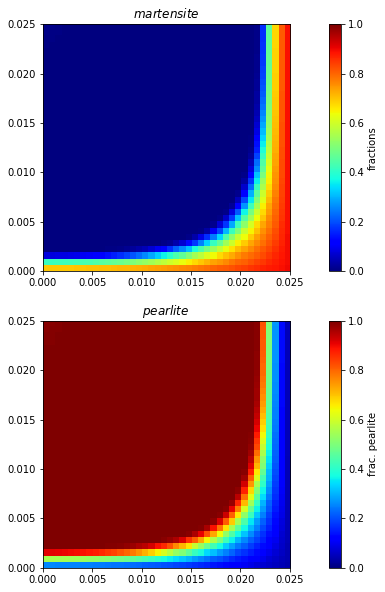

In [21]:
fig1, (axp2, axc2)= plt.subplots(2, 1, sharex=False, sharey=False, figsize=(14,10))

viewer1 = MultiViewer(viewers = (Matplotlib2DGridViewer(vars=fi, title='$martensite$', axes=axp2, \
                                                       datamin=0., datamax=1.), \
                                Matplotlib2DGridViewer(vars=fp,  title='$pearlite$'   , axes=axc2, \
                                                       datamin=0., datamax=1.)))


In [22]:
plt.plot(tempload.reshape(N,N)[:,20])

NameError: name 'tempload' is not defined

In [23]:
%matplotlib inline
temperatureViewer.plot(path + "temperature100.png")

<Figure size 432x288 with 0 Axes>

Plotting the value of the temperature in the middle of the cylinder at the convection surface.

[Text(0,0.5,'Temperature K'),
 Text(0.5,0,'timesteps'),
 Text(0.5,1,'Temperature')]

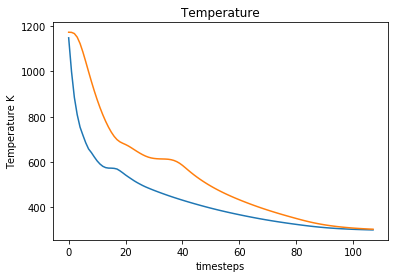

In [24]:
t=[]
t1=[]
for i in range(1,540,5):
    load = np.loadtxt(path+"temperatureOH"+str(i))
    t.append(load.reshape(N,N)[5,1])
    t1.append(load.reshape(N,N)[20,20])
fig, ax = plt.subplots()
ax.plot(t)
ax.plot(t1)
ax.set(title='Temperature',ylabel='Temperature K',xlabel='timesteps')

Plot of the temperature at central point of the cylinder. The temperature rises on the point and then drops again due to enthalphy of austinite to martensite phase transformation. Is this numerical instability??

In [ ]:
plta = plt.plot(Tvstime)

### Martensite and pearlite amounts

Text(0.5,1,'Amount of pearlite (blue) and martensite (red) phases')

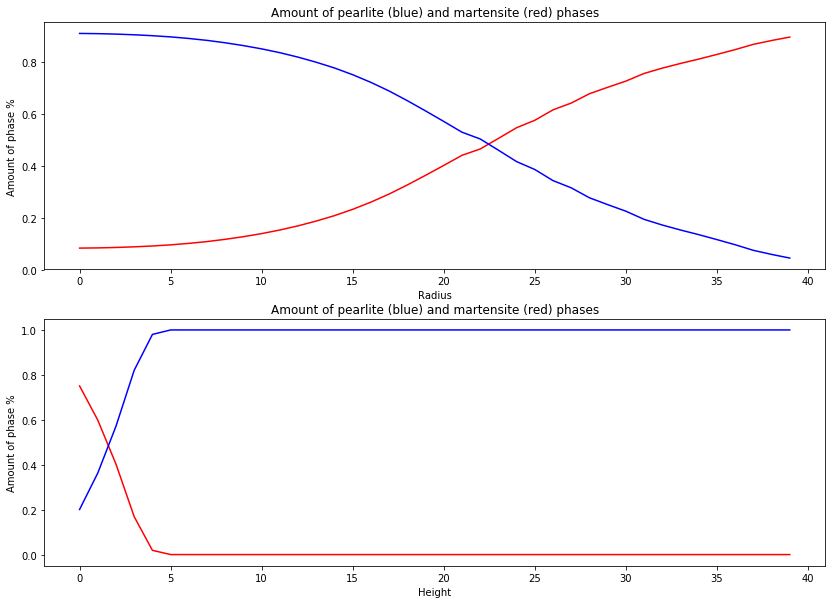

In [25]:
fig2, (axp22, axc22)= plt.subplots(2, 1, sharex=False, sharey=False, figsize=(14,10))

axp22.plot(fi.value.reshape(N,N)[2,:], 'r')
axp22.plot(fp.value.reshape(N,N)[2,:], 'b')
axp22.set_xlabel('Radius')
axp22.set_ylabel('Amount of phase %')
axp22.set_title('Amount of pearlite (blue) and martensite (red) phases')

axc22.plot(fi.value.reshape(N,N)[:,20], 'r')
axc22.plot(fp.value.reshape(N,N)[:,20], 'b')
axc22.set_xlabel('Height')
axc22.set_ylabel('Amount of phase %')
axc22.set_title('Amount of pearlite (blue) and martensite (red) phases')